# Assignment 2 (5 Marks)

Please indicate your name and student id clearly in the submission title and in the file. 

Name: Ryan Kim  

Student ID:  200390560

## Question 1

Please use the same data set as in Assignment 1 for the following plot. 

Visualize the time series: Regular Unleaded Gasoline price in "London" from 2000 to 2022. Smooth the time series using simple moving average with windowsize=5.

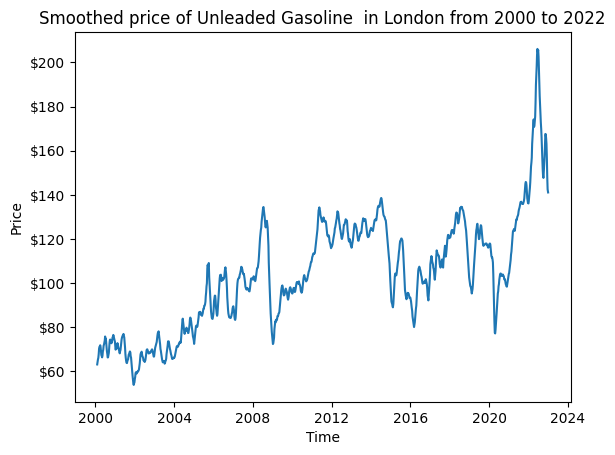

In [11]:
import pandas as pd
import datetime as dt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

# Open Date file in DataFrame form
df = pd.read_csv('data/fueltypesall1991-2023.csv')

# Filter Dataframe to select Date, Prices, and Type of Fuel
filtered = df.filter(items=["Date", "London", "Fuel Type"])

# Change Dates to Datetime objects
filtered["Date"] = pd.to_datetime(df["Date"])

# Conditions to select data for graph
c1 = filtered["Fuel Type"] == "Regular Unleaded Gasoline"
c2 = filtered["Date"].dt.year >= 2000
c3 = filtered["Date"].dt.year <= 2022

# Apply filter conditions
filtered = filtered[c1 & c2 & c3]

# Calculate Simple Moving Average with window of 5
sma = filtered["London"].rolling(5).mean()

y = sma
x = filtered["Date"]


# Titles and labels
plt.title("Smoothed price of Unleaded Gasoline  in London from 2000 to 2022")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%d'))

plt.plot(x, y)


## Question 2

The following data set includes the volcanos in the world. 
https://github.com/plotly/datasets/blob/master/volcano_db.csv

Please plot a map with three countries: Canada, US and Mexico. Show the exact locations (latitude and longitude) of the volcanos on this map.


<AxesSubplot: title={'center': 'Volcanos in Canada, US, and Mexico'}, xlabel='Longitude', ylabel='Latitude'>

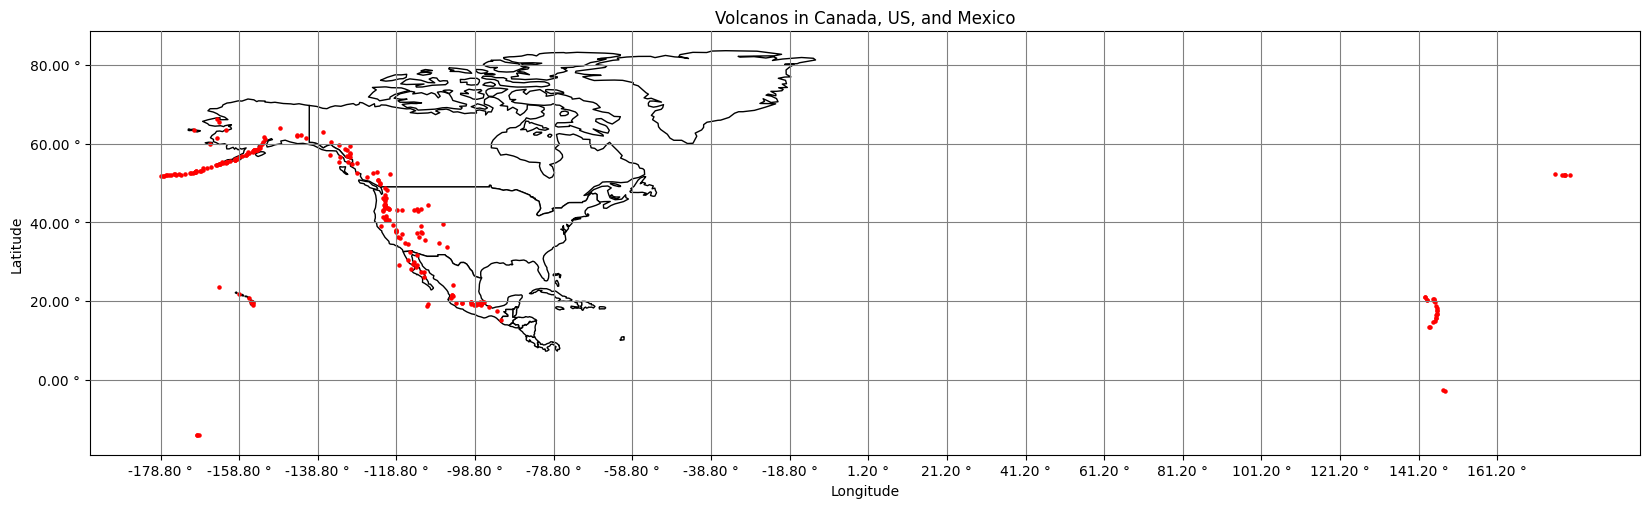

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import geopandas

def format_degrees(value, pos=None):
    '''
    Angles formatting code found at: https://techoverflow.net/2022/06/19/matplotlib-how-to-format-angle-in-degrees/
    '''
    return f'{value:.2f} °'

# Given Code
volcano = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Filter Conditions for Volcano location
c1 = volcano["Country"] == "Canada"
c2 = volcano["Country"] == "United States"
c3 = volcano["Country"] == "Mexico"
filtered = volcano[c1 | c2 | c3]

# Convert pandas DF to geopandas DF
gdf = geopandas.GeoDataFrame(filtered, geometry=geopandas.points_from_xy(filtered["Longitude"], filtered["Latitude"]))

# Create North America axis
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black', figsize=(20,20))

# Create grids
ax.set_axisbelow(False)
ax.yaxis.grid(color='gray', linestyle='solid')
ax.xaxis.grid(color='gray', linestyle='solid')

# Titles and labels
plt.title("Volcanos in Canada, US, and Mexico")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Change xticks increment for better readibility
min_log = min(filtered["Longitude"])
max_log = max(filtered["Longitude"])
ax.set_xticks(np.arange(min_log, max_log, 20))

# Apply angles units to x & y axis
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_degrees))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_degrees))

gdf.plot(ax=ax, color='red', markersize=5)